<a href="https://colab.research.google.com/github/BrokeLuver/Insurance-Cost-Analysis/blob/main/Insurance_cost_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Анализ стоимости медицинского страхования

Выполнено Верещако Д.В. 2025

Ссылка на GitHub данного проекта:

https://github.com/BrokeLuver/Insurance-Cost-Analysis

**Целью данного анализа** является выявление и оценка ключевых факторов, оказывающих наибольшее влияние на стоимость медицинской страховки для физических лиц. На основе данных исследования мы стремимся определить, какие параметры клиента являются наиболее значимыми предикторами высокой стоимости страховки.

###Импорт библиотек

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
from collections import Counter
import plotly.graph_objs as go
from plotly.subplots import make_subplots

###Чтение и предобработка датасета

Чтение датасета происходит по ссылке с моего GitHub для надежности и возможности открытия на разных устройствах

Ссылка на источник датасета: https://www.kaggle.com/datasets/varishabatool/data-set

In [164]:
url = "https://raw.githubusercontent.com/BrokeLuver/Insurance-Cost-Analysis/refs/heads/main/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Описание столбцов:**

* `age` -> возраст

* `sex` -> пол

* `bmi` -> индекс массы тела

* `children` -> количество детей

* `smoker` -> курильщик (yes/no)

* `region` -> регион

* `charges` -> стоимость страховки



---



Очистка строк с недостающей информацией

In [165]:
df = df.dropna()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010




---



Добавление новых столбцов

In [166]:
def age_group(age):
    if age <= 25:
        return 'young'
    elif age <= 45:
        return 'adult'
    else:
        return 'senior'

In [167]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

In [168]:
def expense_level(charge):
    if charge <= 10000:
        return 'low'
    elif charge <= 30000:
        return 'medium'
    else:
        return 'high'

In [169]:
def is_smoker(smoker):
  if smoker == 'yes':
    return 1
  elif smoker == 'no':
    return 0

In [170]:
df['age_group'] = df['age'].apply(age_group)
df['bmi_category'] = df['bmi'].apply(bmi_category)
df['expense_level'] = df['charges'].apply(expense_level)
df['is_smoker'] = df['smoker'].apply(is_smoker)
df

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,expense_level,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight,medium,1
1,18,male,33.770,1,no,southeast,1725.55230,young,obese,low,0
2,28,male,33.000,3,no,southeast,4449.46200,adult,obese,low,0
3,33,male,22.705,0,no,northwest,21984.47061,adult,normal,medium,0
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight,low,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,senior,obese,medium,0
1334,18,female,31.920,0,no,northeast,2205.98080,young,obese,low,0
1335,18,female,36.850,0,no,southeast,1629.83350,young,obese,low,0
1336,21,female,25.800,0,no,southwest,2007.94500,young,overweight,low,0




---



###Предварительный анализ

Основная статистика

In [171]:
print("Основная статистика:")
print(df.describe())

Основная статистика:
               age          bmi     children       charges    is_smoker
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265     0.204783
std      14.049960     6.098187     1.205493  12110.011237     0.403694
min      18.000000    15.960000     0.000000   1121.873900     0.000000
25%      27.000000    26.296250     0.000000   4740.287150     0.000000
50%      39.000000    30.400000     1.000000   9382.033000     0.000000
75%      51.000000    34.693750     2.000000  16639.912515     0.000000
max      64.000000    53.130000     5.000000  63770.428010     1.000000




---



Простые графики для предварительного анализа

In [172]:
fig = px.histogram(df, x="charges", title="Distribution of Insurance Charges", nbins=50)
fig.update_traces(marker=dict(color='blue'))
fig.update_layout(template='ggplot2')
fig.show()

Мы можем увидеть, что в основном преобладают страховые премии до 16.000 долларов



---



In [173]:
count_age = df["age_group"].value_counts()
df_age = pd.DataFrame()
df_age["group"] = [str(i) for i in count_age.index]
df_age["count"] = count_age.values
fig = px.pie(df_age, values="count", names="group", title="Distribution by Age Groups")
fig.show()

На данном графике виден баланс возрастных групп, но молодые клиенты все равно встречаются реже



---



In [174]:
count_bmi = df["bmi_category"].value_counts()
df_bmi = pd.DataFrame()
df_bmi["category"] = [str(i) for i in count_bmi.index]
df_bmi["count"] = count_bmi.values
fig = px.pie(df_bmi, values="count", names="category", title="Distribution by BMI Categories")
fig.show()

Этот график показывает, что в выборке преобладают люди с ожирением и имеющие лишний вес. Нормальный вес составляет меньше четверти клиентов.



---



In [175]:
count_expense = df["expense_level"].value_counts()
df_expense = pd.DataFrame()
df_expense["level"] = [str(i) for i in count_expense.index]
df_expense["count"] = count_expense.values
fig = px.pie(df_expense, values="count", names="level", title="Distribution by Expense Levels")
fig.show()

Большинство клиентов имеют низкую или среднюю стоимость страховки



---



In [176]:
count_smokers = df["smoker"].value_counts()
df_smokers = pd.DataFrame()
df_smokers["smoking"] = [str(i) for i in count_smokers.index]
df_smokers["count"] = count_smokers.values
fig = px.pie(df_smokers, values="count", names="smoking", title="Distribution by smoking")
fig.show()

В выборке преобладают некурящие люди (79.5%)



---



In [177]:
fig = px.box(df, x="smoker", y="charges", title="Insurance Charges by Smoking Status")
fig.show()

Курящие люди платят гораздо большие страховые премии. Медианная стоимость страховки курильщиков в ~4.85 раз выше, чем у некурящих людей. Самые высокие страховые премии тоже приходятся на курильщиков. У некурящих стоимость страховки сконцентрирована в нижнем диапазоне. **Стоит проверить взаимосвязь между курением и стоимостью страховки**



---



In [178]:
fig = px.box(df, x="region", y="charges", title="Insurance Charges by Region")
fig.show()

По графику становится понятно, что региональные различия менее влиятельны на стоимость страховки, но на юго-востоке и северо-востоке преобладают более высокие страховые премии

###Гипотезы

**4 гипотезы для проверки:**
* Гипотеза 1: Курение значительно увеличивает стоимость страховки
* Гипотеза 2: Возраст положительно коррелирует со стоимостью страховки
* Гипотеза 3: BMI влияет на стоимость страховки
* Гипотеза 4: Количество детей влияет на стоимость страховки



---



In [179]:
fig = px.scatter(df, x="age", y="charges", color="smoker",
                title="Age vs Charges by Smoking Status",
                trendline="ols")
fig.show()

Видна положительная корелляция возраста и стоимости страховки как у курильщиков, так и некурящих и подтверждается зависимость между курением и стоимостью страховки



---



In [180]:
fig = px.scatter(df, x="bmi", y="charges", color="smoker",
                title="BMI vs Charges by Smoking Status",
                trendline="ols")
fig.show()

Курение и повышенный вес приводят к самым высоким страховым премиям.

Некурящие даже с высоким индексом массы тела все равно платят умеренные страховые премии.



---



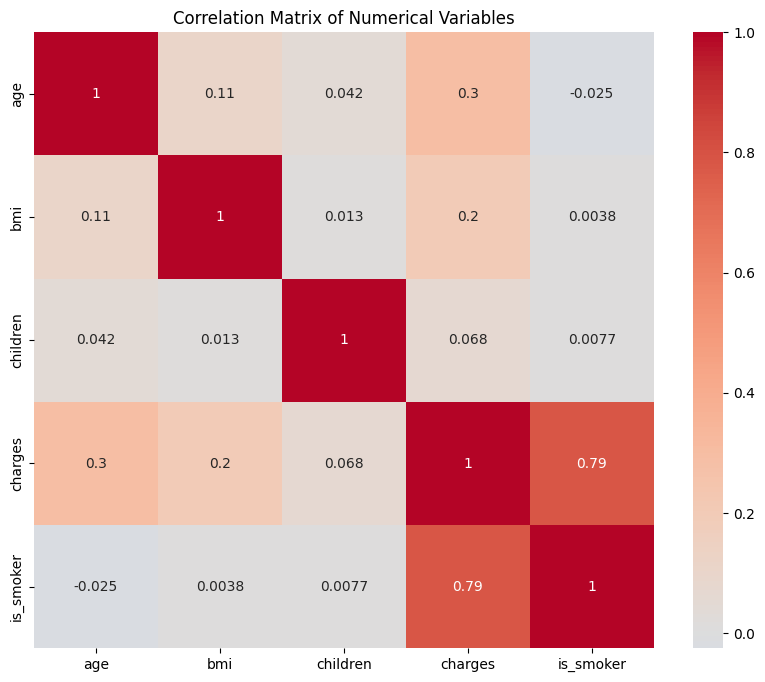

In [181]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

Самый сильный уровень корреляции со стоимостью тарифа виден у курения (0.79), что говорит об очень сильной зависимости.

Также, со стоимостью страховки кореллирует возраст (0.3) и индекс массы тела (0.2). Сам же возраст слабо кореллирует с весом.

Количество детей имеет наименьшее влияние на стоимость страховки (0.068), но стоит это проверить.



---



In [182]:
fig = px.box(df, x="children", y="charges", title="Insurance Charges by Number of Children")
fig.show()

Можно заметить, что клиенты с 2-3 детьми платят больше за страховку. Люди без детей имеют наибольшее количество бОльших выбросов (вспоминаем предыдущие рассуждения о курении, индексе массы тела и возрасте). Люди с 5 детьми платят за страховку меньше всего.



---



In [183]:
fig = px.box(df, x="sex", y="charges", title="Insurance Charges by Gender")
fig.show()

Медианные значения у обоих полов имеют схожие значения с незначитальной погрешностью, но чаще более дорогие страховки покупают мужчины. Но влияние не такое сильное, как у зависимостей с курением и весом.



---



In [184]:
high_charges = df[df['charges'] > 30000]
print("Анализ высоких страховых расходов (>30000):")
print(f"Количество случаев: {len(high_charges)}")
print(f"Процент курильщиков: {high_charges['smoker'].value_counts(normalize=True)['yes']*100:.1f}%")
print(f"Средний возраст: {high_charges['age'].mean():.1f}")
print(f"Средний BMI: {high_charges['bmi'].mean():.1f}")

Анализ высоких страховых расходов (>30000):
Количество случаев: 162
Процент курильщиков: 93.8%
Средний возраст: 40.4
Средний BMI: 34.8


Сравним средние показатели во выборке и владельцев дорогих страховок:
* доля высоких страховых премий составляет 12% от всей выборки
* процент курильщиков 93.8% с дорогими страховками против общей доли курильщиков в выборке 20.5%
* средний возраст соответствует среднему возрасту по выборке (~40 лет)
* средний индекс массы тела у клиентов с дорогими страховками (34.8) выше, чем по всей выборке (30.6)



---



In [185]:
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_value = st.ttest_ind(smoker_charges, non_smoker_charges)
print(f"\nT-тест расходов курильщики vs некурящие:")
print(f"t-статистика: {t_stat:.2f}, p-value: {p_value:.2e}")


T-тест расходов курильщики vs некурящие:
t-статистика: 46.66, p-value: 8.27e-283


p-value практически равен 0 (p < 0.0001), что говорит о статистичсеки значимой разнице -- страховые премии курильщиков достоверно выше.



---



In [186]:
from scipy.stats import f_oneway
regions_charges = [df[df['region'] == region]['charges'] for region in df['region'].unique()]
f_stat, p_value_region = f_oneway(*regions_charges)
print(f"\nANOVA тест по регионам:")
print(f"F-статистика: {f_stat:.2f}, p-value: {p_value_region:.4f}")


ANOVA тест по регионам:
F-статистика: 2.97, p-value: 0.0309


По данным результатам можно сказать, что регион проживания имеет слабое, но статистически значимое влияние на стоимость страховки



---



In [187]:
fig = px.scatter_3d(df, x='age', y='bmi', z='charges', color='smoker',
                   title='3D Analysis: Age, BMI, Charges and Smoking Status')
fig.show()

По графику можно заметить три основных слоя распределения:
1. Нижний слой, в котором преобладают некурящие. В этом слое BMI почти не оказывает влияния, в отличие от возраста. С возрастом растет стоимость страховки независимо от индекса массы тела. Стоимость страховки составляет от ~1100-20000 долларов.
2. Средний слой, в котором при BMI < 30 больше курильщиков, а при BMI > 30 больше некурящих людей. В этом слое индекс массы тела уже влияет на цену страховки (с индексом массы тела растет и стоимость) и так же прослеживается влияние возрастания возраста в сторону повышения стоимости. Стоимость страховки составляет от ~11000-33000 долларов.
3. Верхний слой, в котором больше всего курильщиков. В данном слое самые высокие страховые премии. В нем большое влияение имеют факторы и возраста, и индекса массы тела. Если человек курящий, с высоким BMI и в возрасте, то вероятнее, что его страховка будет одной из самых дорогих по всей выборке. Стоимость страховки составляет ~32000-50000 долларов.

###**Ответы на гипотезы:**

**Гипотеза 1:** Курение значительно увеличивает стоимость страховки
* Корреляция Пирсона 0.79, что является самым сильным влияющим фактором
* Медианная стоимость страховки курильщиков - 34.456 долларов, когда у некурящих - 3.984 долларов;
* p-value < 0.0001 - статистически важно;
* На визуализации видно четкое разделение

**Подтверждена**



---



**Гипотеза 2:** Возраст положительно коррелирует со стоимостью страховки
* Корреляция Пирсона - 0.30, что говорит об умеренной положительной корреляции
* Графики показывают, что люди старше платят более высокие страховые премии

**Подтверждена**



---



**Гипотеза 3:** BMI влияет на стоимость страховки
* Корреляция Пирсон - 0.20, что говорит о слабой положительной связи
* Влияние наблюдается не во всех случаях (в случаях средней и высокой категории стоимости)
* BMI показывает большое влияние на стоимость страховки в совокупности с курением

**Частично подтверждена**



---



**Гипотеза 4:** Количество детей влияет на стоимость страховки
* Небольшое увеличение стоимости заметно при наличии 2-3 детей и уменьшение у клиентов с 5 детьми, но медианные значения не сильно варьируются
* Низкая корреляция Пирсона - 0.068

**Подтверждено, но с низкой практической значимостью**

###Выводы по анализу

Стоимость медицинской страховки определяется взаимодействием факторов. Курение -- безусловно главный ценообразующий фактор. Возраст является стабильным фактором роста стоимости. Индекс массы тела играет важную роль, но в основном усиливает риск для курящих клиентов. Остальные факторы (дети, пол, регион) имеют минимальное влияние на итоговую стоимость.

Практическая рекомендация для страховой компании: Модель ценообразования должна в первую очередь учитывать статус курения и возраст клиента. Высокий BMI должен быть весомым фактором для клиентов из группы риска (курящих). Факторы наличия детей и региона могут быть использованы для тонкой настройки тарифов, но не должны быть в их основе.

###Построение модели машинного обучения

Импорт библиотек

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Подготовка данных для ML

In [189]:
ml_df = df.copy()

Кодирование категориальных переменных

In [190]:
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

In [191]:
for column in categorical_columns:
    le = LabelEncoder()
    ml_df[column] = le.fit_transform(ml_df[column])
    label_encoders[column] = le

Выбор фич и таргета

In [192]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region',]
X = ml_df[features]
y = ml_df['charges']

Разделение на тренировочную и тестовую выборки

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабирование числовых признаков

In [194]:
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

Обучение линейной регрессии

In [195]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Обучение RandomForest

In [196]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Сохранение предсказания

In [197]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

Оценка моделей

In [198]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} результаты:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.4f}")

    return mae, rmse, r2

In [199]:
lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, y_pred_lr, "Линейная регрессия")
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, y_pred_rf, "RandomForest")


Линейная регрессия результаты:
MAE: 4186.51
RMSE: 5799.59
R^2: 0.7833

RandomForest результаты:
MAE: 2520.15
RMSE: 4572.57
R^2: 0.8653


RandomForest показал результаты лучше, чем у линейной регрессии по всем метрикам:
* MAE = 2520.15 указывает на то, что средняя ошибка предсказания составляет около 2500 долларов, что является примлемым результатом для социальной сферы, где далеко не все результаты распределяются линейно.
* RMSE = 4572.57 говорит о том, что на высоких результатах у модели присутствуют ошибки
* R^2 = 0.8653 говорит, что модель смогла объяснить ~86.5% дисперсии целевой переменной, что является нормальным результатом.

То, что модель линейной регрессии справилась хуже, чем RandomForest указывает на наличие нелинейных зависимостей.

Важность признаков

In [200]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("Важность признаков (Случайный лес):")
print(feature_importance)


Важность признаков (Случайный лес):
    feature  importance
4    smoker    0.608618
2       bmi    0.216291
0       age    0.134554
3  children    0.020199
5    region    0.013926
1       sex    0.006412


In [201]:
fig = px.bar(feature_importance, x='importance', y='feature',
             title='Важность признаков в модели случайного леса',
             orientation='h')
fig.show()

Данный график подтверждает выводы общего анализа датасета, где самым важным фактором ценообразования медицинской страховки является статус курильщика клиента, но для модели индекс массы тела оказался приоритетнее нежели возраст клиента.

Данная модель подойдет страховым компаниям для предварительной оценки риска клиента, общего анализа и сгементации клиентов, а также для долгосрочного планирования тарифов.